- works best with `yes no` kind of problems
- Binomial - Deals with two classes, YES or NO
- multinomial - Deals with multiple classes


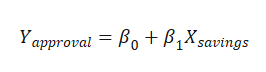

- We are doing regression, in both cases
- trying to fit a line through the data

In the case above, data is modelled via straight line using: y = mx + c

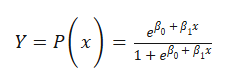

Data is modelled using a sigmoid function: y = sigmoid(x) 

Model Logistic Regression:
- Learning Parameters: Co-efficients = weights and bias  =  w1* x1 + B
- Loss function: LOG-LOSS

### Try to understand somethings about CLASSIFICATION

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error

tips = sns.load_dataset('tips')
tips.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


- **Feature Engineering**: is legit
    - The classifier, logistic regression, will not accept, continous values.
    - we supply catagorical values

In [3]:
# simple, manual label encoding using map method
tips['smoker_bin'] = tips['smoker'].map({
    'Yes': 1,
    'No' : 0}
)

tips['sex_bin'] = tips['sex'].map({
    'Male': 1,
    'Female' : 0}
)

tips.head(2)

,total_bill,tip,sex,smoker,day,time,size,smoker_bin,sex_bin
0,16.99,1.01,Female,No,Sun,Dinner,2,0,0
1,10.34,1.66,Male,No,Sun,Dinner,3,0,1


In [30]:
# X = tips[['smoker_bin']] # 0101011101110101
y = tips['tip'] # continous

# convert the target column, then use it for y

X = tips[['total_bill']] 
y = tips['sex_bin'] # encoded column

# yes, how much did they tip?
# are we predicting a continous value?

using this dataset, linear regression: 
- take a contious values
- predict a continous value

Logistic Regression
- classification algorithm
- tips(continous) vs smoker_bin (catagorical)

REGRESSION
- Are you trying to predict the tip amount (REGRESSION), based on if a person smokes or not?
- use smoker or not, to judge the amount of bill

CLASSIFICATION
- if a certain amount of tip, can we predict, if person is a smoker or not? (CLASSIFICATION)
- use bill to judge smoker or not

Failsafe for pushing alphbetic/non numeric data into the model
- if you accidentally, use a binary category for y, still be able to classify things
- it will do the label encoding internally, when doing the model fit

In [7]:
y_train

228    1
208    1
96     1
167    1
84     1
      ..
106    1
14     0
92     0
179    1
102    0
Name: sex_bin, Length: 195, dtype: category
Categories (2, int64): [1, 0]

In [31]:
model_Logistic = LogisticRegression() # classification

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state= 42, test_size=0.2)

model_Logistic.fit(X_train, y_train) # fitting here, must be numeric

y_pred = model_Logistic.predict(X_test)

In [28]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1], dtype=int64)

In [22]:
# evaluate performance
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# confusion matrix
accuracy_test = accuracy_score(y_test, y_pred)
accuracy_test

cm = confusion_matrix(y_test, y_pred)
print(cm)

cr = classification_report(y_test,y_pred)
print(cr)

[[ 1 18]
 [ 0 30]]
              precision    recall  f1-score   support

           0       1.00      0.05      0.10        19
           1       0.62      1.00      0.77        30

    accuracy                           0.63        49
   macro avg       0.81      0.53      0.43        49
weighted avg       0.77      0.63      0.51        49



tips

In [ ]:
tips['sex_bin'].value_counts()

# model will be biased towards the 1

sex_bin
1    157
0     87
Name: count, dtype: int64

In [25]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,smoker_bin,sex_bin
0,16.99,1.01,Female,No,Sun,Dinner,2,0,0
1,10.34,1.66,Male,No,Sun,Dinner,3,0,1
2,21.01,3.50,Male,No,Sun,Dinner,3,0,1
3,23.68,3.31,Male,No,Sun,Dinner,2,0,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0,0


Classification Metrics:

- Accuracy = all the time - not that usable - imbalance, it will not show you true performance
- Precision = when FP are crucial =  TP / TP + FP - 
- Recall = when FN are crucial = TP / TP + FN 
- F1 Score = to check performance in general = 